# Data from  Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) 
### https://github.com/CSSEGISandData/COVID-19

In [95]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def get_country(df, pattern):
    ts = df[df['Country/Region'] .str.contains(pattern)]
    return ts


In [3]:
! ls COVID-19/csse_covid_19_data/csse_covid_19_time_series/

Errata.csv
README.md
time_series_covid19_confirmed_global.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_recovered_global.csv


In [117]:
filein = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(filein)
print(confirmed.shape)

filein = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(filein)
print(deaths.shape)

filein = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = pd.read_csv(filein)
print(recovered.shape)

(264, 99)
(264, 99)
(250, 99)


         Confirmed  Deaths  Recovered  Active
4/24/20      22797     854       1228   21569
4/25/20      23392     880       1277   22115


Text(0.5, 1.0, 'Portugal')

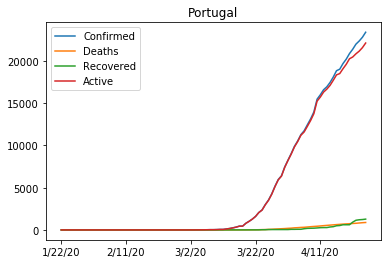

In [114]:
country = 'Portugal' 
conf = get_country(confirmed, country)
deat = get_country(deaths, country)
reco = get_country(recovered, country)
ts = pd.concat({'Confirmed': conf, 'Deaths': deat, 'Recovered': reco})
ts = ts.drop(ts.columns[:4],axis=1)
ts = ts.set_index(ts.index.droplevel(1))
ts = ts.T
ts['Active'] = ts['Confirmed'] - ts['Recovered']
print(ts.tail(2))
ax = ts.plot()
ax.set_title(country)


         Confirmed  Deaths  Recovered  Active
4/24/20       1461      18       1118     343
4/25/20       1470      18       1142     328


Text(0.5, 1.0, 'New Zealand')

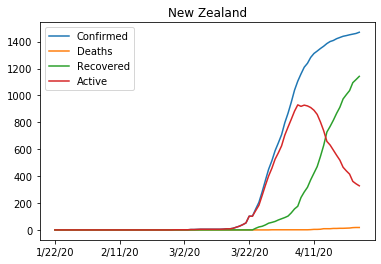

In [118]:
country = 'New Zealand' 
conf = get_country(confirmed, country)
deat = get_country(deaths, country)
reco = get_country(recovered, country)
ts = pd.concat({'Confirmed': conf, 'Deaths': deat, 'Recovered': reco})
ts = ts.drop(ts.columns[:4],axis=1)
ts = ts.set_index(ts.index.droplevel(1))
ts = ts.T
ts['Active'] = ts['Confirmed'] - ts['Recovered']
print(ts.tail(2))
ax = ts.plot()
ax.set_title(country)


Text(0.5, 0.98, 'Portugal')

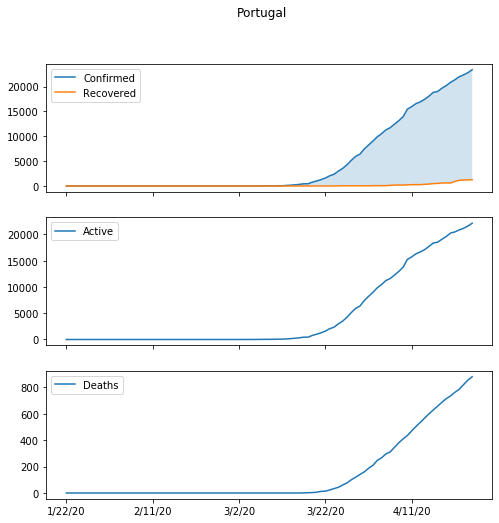

In [115]:
fig, axs = plt.subplots(3, 1, figsize=(8,8), sharex=True)
ax = axs[0]
ts[['Confirmed', 'Recovered']].plot(ax=ax)
ax.fill_between(ts.index, ts['Recovered'], ts['Confirmed'], alpha=0.2)

ax = axs[1]
ts[['Active']].plot(ax=ax)

ax = axs[2]
ts[['Deaths']].plot(ax=ax)

fig.suptitle(country)